In [ ]:
# ! pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -------- ------------------------------ 30.7/139.4 kB 435.7 kB/s eta 0:00:01
   ---------------------- ---------------- 81.9/139.4 kB 651.6 kB/s eta 0:00:01
   -------------------------------------- 139.4/139.4 kB 751.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ----------- ---------------------------- 61.4/215.0 kB ? eta -:--:--
   ------------- ------------------------- 71.7/215.0 kB 975.2 kB/s eta 0:00:01
   ---------------- ---------------------- 92.2/215.0 kB 871.5 kB/s eta 0:00:01
   ---------------- ----------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('ipl_data.csv')

In [ ]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [ ]:
df = df.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'mid', 'striker', 'non-striker'], axis=1)

In [ ]:
x = df.drop('total', axis=1)
y = df['total']

In [ ]:
encoder = ce.OrdinalEncoder(cols=['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler'], return_df=True)
x = encoder.fit_transform(x)

In [ ]:
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

venue_encoder.fit_transform(x['venue'])
batting_team_encoder.fit_transform(x['bat_team'])
bowling_team_encoder.fit_transform(x['bowl_team'])
striker_encoder.fit_transform(x['batsman'])
bowler_encoder.fit_transform(x['bowler'])

In [ ]:
x

,venue,bat_team,bowl_team,batsman,bowler
0,1,1,1,1,1
1,1,1,1,2,1
2,1,1,1,2,1
3,1,1,1,2,1
4,1,1,1,2,1
...,...,...,...,...,...
76009,7,4,14,364,179
76010,7,4,14,364,179
76011,7,4,14,364,179
76012,7,4,14,309,179


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(x_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 57.4220 - val_loss: 22.1503
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0324 - val_loss: 21.7264
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 21.9233 - val_loss: 21.7036
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 21.8600 - val_loss: 21.6735
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 21.8504 - val_loss: 21.6368
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 21.9367 - val_loss: 21.6346
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 21.8848 - val_loss: 21.5909
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 21.7806 - val_loss: 21.5755
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 21.8706 - val_loss: 21.5538
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.0346 - val_loss: 21.9042
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 21.8362 - val_loss: 21.6263
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

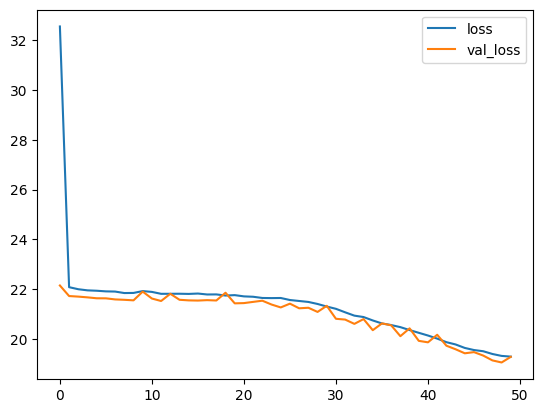

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
# Make predictions
predictions = model.predict(x_test_scaled)
 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


19.771325224257698

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
 
import warnings
warnings.filterwarnings("ignore")
 
venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')
 
predict_button = widgets.Button(description="Predict Score")
 
def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
         
 
        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])
 
 
        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])
 
        print(predicted_score)

In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)